<a href="https://colab.research.google.com/github/rlcoelho/mvp-qualidade/blob/master/MVP3_MeuColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes
### Prática de Machine Learning em Python
##### Problema. Saber a qualidade do vinho a partir dos parametros

## Imports para criação e treinamento do modelo

In [48]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from pickle import dump
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

In [49]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/RodolphoGLC/teste/refs/heads/main/winequality-red.csv"

dataset = pd.read_csv(url, delimiter=',')

dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploração dos dados

In [50]:
def get_df_info(dataset):
    print("\n\033[1mFormato do DataFrame:\033[0m ", dataset.shape)
    print("\n\033[1mColunas no DataFrame:\033[0m ", dataset.columns.to_list())
    print("\n\033[1mTipos de dados das colunas:\033[0m\n", dataset.dtypes)

    print("\n\033[1mInformações sobre o DataFrame:\033[0m")
    dataset.info()

    print("\n\033[1mNúmero de valores exclusivos em cada coluna:\033[0m")
    for col in dataset.columns:
        print(f"\033[1m{col}\033[0m: {dataset[col].nunique()}")

    print("\n\033[1mNúmero de valores nulos em cada coluna:\033[0m\n", dataset.isnull().sum())
    print("\n\033[1mNúmero de linhas duplicadas:\033[0m ", dataset.duplicated().sum())
    print("\n\033[1mEstatísticas do DataFrame:\033[0m\n", dataset.describe().transpose())

# Chamada da função
get_df_info(dataset)


Formato do DataFrame:  (1599, 12)

Colunas no DataFrame:  ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Tipos de dados das colunas:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-nu

## Pré Processamento e separação em conjunto de treino e conjunto de teste com holdout

In [51]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 202507 # semente aleatória

array = dataset.values

# Divide o DataFrame em (X) e (y)
X = array[:,0:11]
y = array[:,11]


# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.496487 (0.048866)
CART: 0.590262 (0.027811)
NB: 0.534787 (0.030973)
SVM: 0.500443 (0.033271)


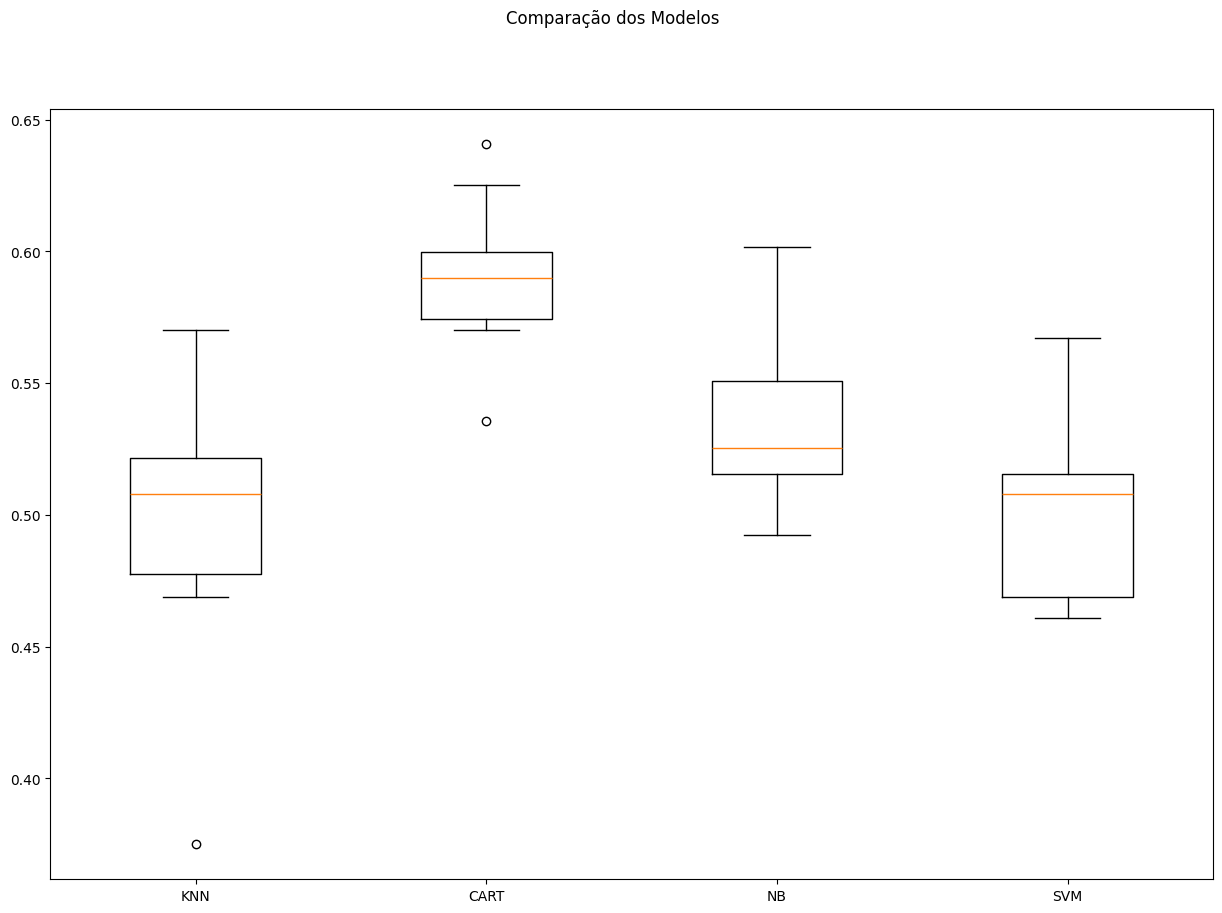

In [52]:
np.random.seed(202507) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.580149 (0.032855)
KNN: 0.496487 (0.048866)
CART: 0.590262 (0.027811)
NB: 0.534787 (0.030973)
SVM: 0.500443 (0.033271)
Bagging: 0.676316 (0.018088)
RF: 0.685698 (0.033959)
ET: 0.677867 (0.031076)
Ada: 0.496494 (0.044762)
GB: 0.640354 (0.038490)
Voting: 0.594230 (0.022750)


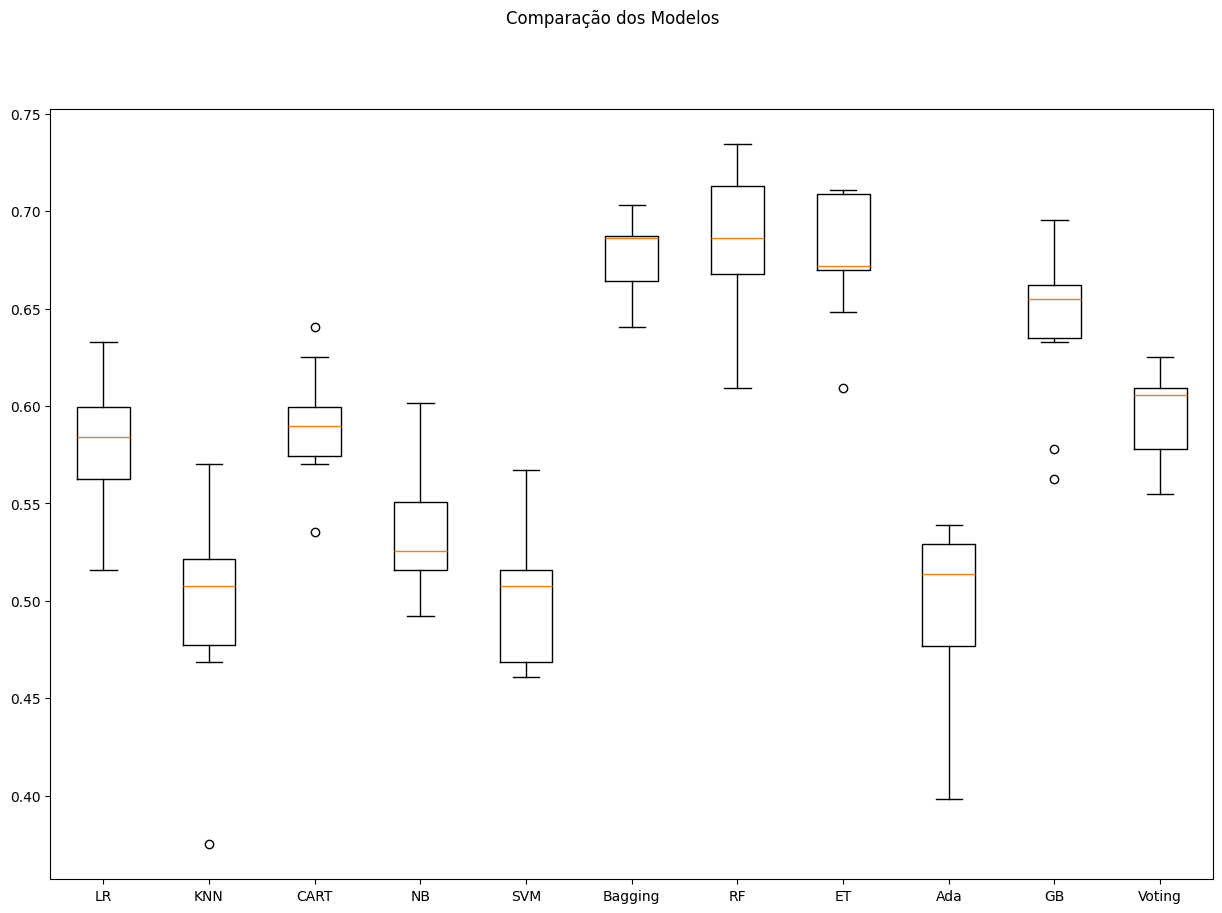

In [53]:
np.random.seed(202507) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [ ]:
np.random.seed(202507)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

### Criação e avaliação de modelos: dados padronizados e normalizados

In [ ]:
# np.random.seed(202507) # definindo uma semente global para este bloco

# # Listas para armazenar os pipelines e os resultados para todas as visões do dataset
# pipelines = []
# results = []
# names = []

# # Algoritmos que serão utilizados
# knn = ('KNN', KNeighborsClassifier())
# cart = ('CART', DecisionTreeClassifier())
# naive_bayes = ('NB', GaussianNB())
# svm = ('SVM', SVC())

# # Transformações que serão utilizadas
# standard_scaler = ('StandardScaler', StandardScaler())
# min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# # Dataset original
# pipelines.append(('KNN-orig', Pipeline([knn])))
# pipelines.append(('CART-orig', Pipeline([cart])))
# pipelines.append(('NB-orig', Pipeline([naive_bayes])))
# pipelines.append(('SVM-orig', Pipeline([svm])))

# # Dataset Padronizado
# pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
# pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
# pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
# pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# # Dataset Normalizado
# pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
# pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
# pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
# pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# # Executando os pipelines
# for name, model in pipelines:
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
#     print(msg)

# # Boxplot de comparação dos modelos
# fig = plt.figure(figsize=(25,6))
# fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names, rotation=90)
# plt.show()

LR-orig: 0.580 (0.033)
KNN-orig: 0.496 (0.049)
CART-orig: 0.590 (0.028)
NB-orig: 0.535 (0.031)
SVM-orig: 0.500 (0.033)
Bag-orig: 0.676 (0.018)
RF-orig: 0.686 (0.034)
ET-orig: 0.678 (0.031)
Ada-orig: 0.496 (0.045)
GB-orig: 0.640 (0.038)
Vot-orig: 0.594 (0.023)
LR-padr: 0.584 (0.028)
KNN-padr: 0.564 (0.037)
CART-padr: 0.604 (0.038)
NB-padr: 0.538 (0.033)
SVM-padr: 0.613 (0.029)
Bag-padr: 0.673 (0.029)
RF-padr: 0.677 (0.025)
ET-padr: 0.684 (0.030)
Ada-padr: 0.496 (0.045)
GB-padr: 0.639 (0.037)
Vot-padr: 0.606 (0.035)
LR-norm: 0.573 (0.038)
KNN-norm: 0.555 (0.029)
CART-norm: 0.611 (0.036)
NB-norm: 0.538 (0.033)
SVM-norm: 0.597 (0.046)
Bag-norm: 0.673 (0.021)
RF-norm: 0.681 (0.025)
ET-norm: 0.689 (0.034)
Ada-norm: 0.496 (0.045)
GB-norm: 0.640 (0.034)
Vot-norm: 0.593 (0.039)


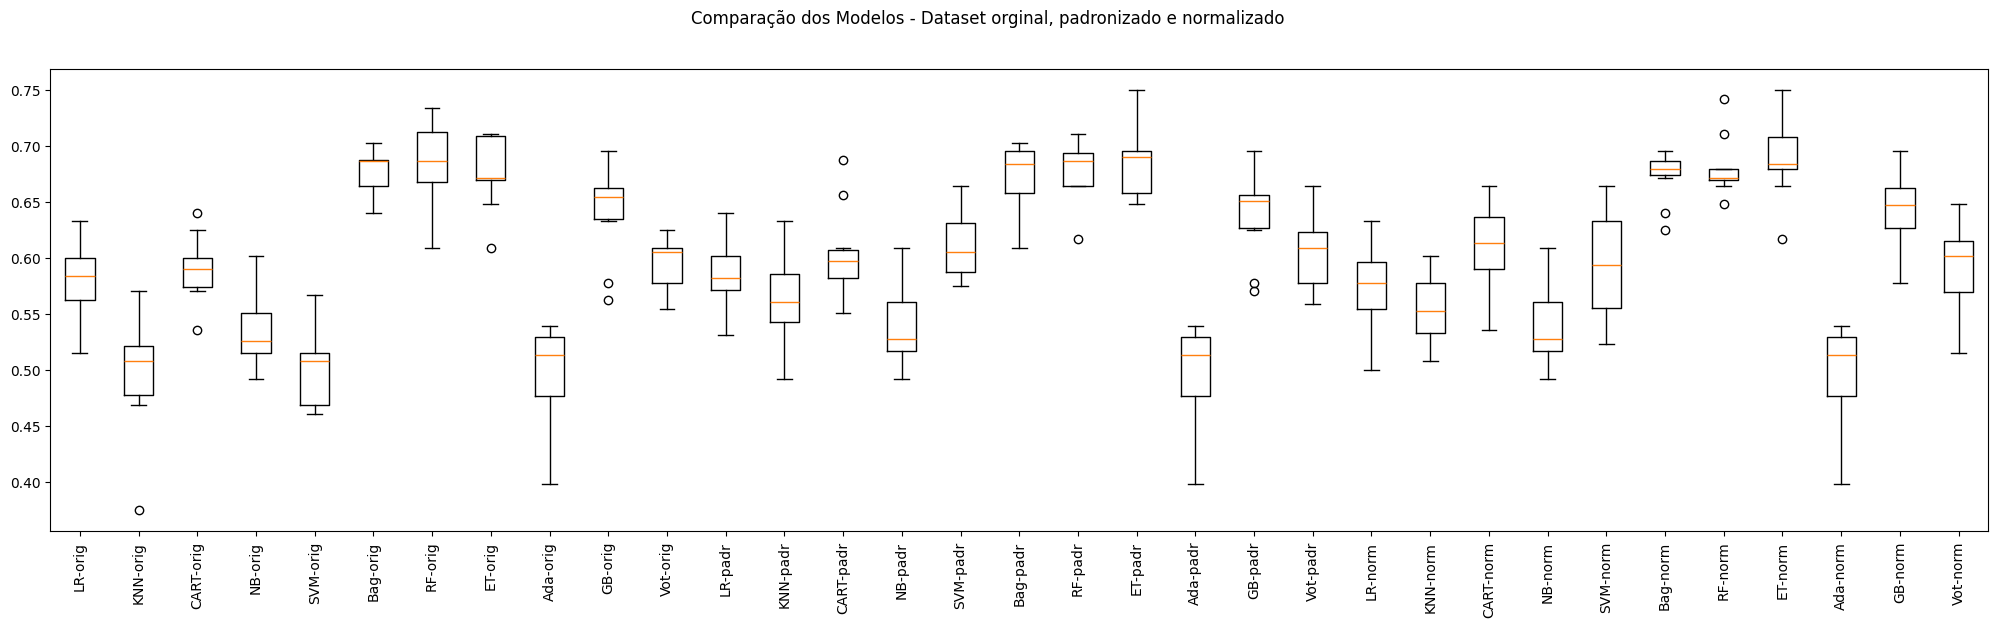

In [54]:
np.random.seed(202507) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização com hiperparâmetros

#### Otimização do AdaBoost

In [ ]:
pipeline_ada_orig = Pipeline(steps=[('Ada', AdaBoostClassifier())])
pipeline_ada_padr = Pipeline(steps=[('StandardScaler', StandardScaler()), ('Ada', AdaBoostClassifier())])
pipeline_ada_norm = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('Ada', AdaBoostClassifier())])

param_grid_ada = {
    'Ada__n_estimators': [10, 50, 100, 200],
    'Ada__learning_rate': [0.01, 0.1, 1, 10]
}

for pipeline, label in zip([pipeline_ada_orig, pipeline_ada_padr, pipeline_ada_norm], ['orig', 'padr', 'norm']):
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_ada, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    print(f"Modelo: Ada-{label} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

#### Otimização do Extra Trees

In [ ]:
pipeline_et_orig = Pipeline(steps=[('ET', ExtraTreesClassifier())])
pipeline_et_padr = Pipeline(steps=[('StandardScaler', StandardScaler()), ('ET', ExtraTreesClassifier())])
pipeline_et_norm = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('ET', ExtraTreesClassifier())])

param_grid_et = {
    'ET__n_estimators': [10, 50, 100, 200],
    'ET__max_features': ['auto', 'sqrt', 'log2'],
    'ET__max_depth': [None, 10, 20, 30],
    'ET__min_samples_split': [2, 5, 10],
    'ET__min_samples_leaf': [1, 2, 4]
}

for pipeline, label in zip([pipeline_et_orig, pipeline_et_padr, pipeline_et_norm], ['orig', 'padr', 'norm']):
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_et, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    print(f"Modelo: ET-{label} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

#### Otimização do Random Forest

In [37]:
# Random Forest
pipeline_rf_orig = Pipeline(steps=[('RF', RandomForestClassifier())])
pipeline_rf_padr = Pipeline(steps=[('StandardScaler', StandardScaler()), ('RF', RandomForestClassifier())])
pipeline_rf_norm = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', RandomForestClassifier())])

param_grid_rf = {
    'RF__n_estimators': [10, 50, 100, 200],
    'RF__max_features': ['auto', 'sqrt', 'log2'],
    'RF__max_depth': [None, 10, 20, 30],
    'RF__min_samples_split': [2, 5, 10],
    'RF__min_samples_leaf': [1, 2, 4]
}

for pipeline, label in zip([pipeline_rf_orig, pipeline_rf_padr, pipeline_rf_norm], ['orig', 'padr', 'norm']):
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_rf, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    print(f"Modelo: RF-{label} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

KeyboardInterrupt: 

#### Otimização do LR

In [ ]:
# Otimização LR - Logistic Regression
pipeline_lr_orig = Pipeline(steps=[('LR', LogisticRegression(max_iter=200))])
pipeline_lr_padr = Pipeline(steps=[('StandardScaler', StandardScaler()), ('LR', LogisticRegression(max_iter=200))])
pipeline_lr_norm = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('LR', LogisticRegression(max_iter=200))])

param_grid_lr = {
    'LR__C': [0.01, 0.1, 1, 10, 100],
    'LR__solver': ['liblinear', 'saga']
}

for pipeline, label in zip([pipeline_lr_orig, pipeline_lr_padr, pipeline_lr_norm], ['orig', 'padr', 'norm']):
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_lr, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    print(f"Modelo: LR-{label} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

#### Otimização do CART

In [ ]:
pipeline_cart_orig = Pipeline(steps=[('CART', DecisionTreeClassifier())])
pipeline_cart_padr = Pipeline(steps=[('StandardScaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipeline_cart_norm = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('CART', DecisionTreeClassifier())])

param_grid_cart = {
    'CART__max_depth': [None, 10, 20, 30, 40, 50],
    'CART__min_samples_split': [2, 5, 10],
    'CART__min_samples_leaf': [1, 2, 4]
}

for pipeline, label in zip([pipeline_cart_orig, pipeline_cart_padr, pipeline_cart_norm], ['orig', 'padr', 'norm']):
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_cart, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    print(f"Modelo: CART-{label} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

#### Otimização do Bagging

In [ ]:
base_estimator = DecisionTreeClassifier()
pipeline_bagging_orig = Pipeline(steps=[('Bagging', BaggingClassifier(estimator=base_estimator, n_estimators=100))])
pipeline_bagging_padr = Pipeline(steps=[('StandardScaler', StandardScaler()), ('Bagging', BaggingClassifier(estimator=base_estimator, n_estimators=100))])
pipeline_bagging_norm = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('Bagging', BaggingClassifier(estimator=base_estimator, n_estimators=100))])

# Sem parâmetros para ajustar neste caso
param_grid_bagging = {}

for pipeline, label in zip([pipeline_bagging_orig, pipeline_bagging_padr, pipeline_bagging_norm], ['orig', 'padr', 'norm']):
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_bagging, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    print(f"Modelo: Bagging-{label} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

#### Otimização do Gradient Boosting

In [ ]:
pipeline_gb_orig = Pipeline(steps=[('GB', GradientBoostingClassifier())])
pipeline_gb_padr = Pipeline(steps=[('StandardScaler', StandardScaler()), ('GB', GradientBoostingClassifier())])
pipeline_gb_norm = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('GB', GradientBoostingClassifier())])

param_grid_gb = {
    'GB__n_estimators': [10, 50, 100, 200],
    'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'GB__max_depth': [3, 5, 7, 9]
}

for pipeline, label in zip([pipeline_gb_orig, pipeline_gb_padr, pipeline_gb_norm], ['orig', 'padr', 'norm']):
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_gb, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    print(f"Modelo: GB-{label} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

Resultado: knn-orig - Melhor: 0.574705 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Resultado: knn-padr - Melhor: 0.623161 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Resultado: knn-norm - Melhor: 0.620011 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


#### Otimização do KNN

In [7]:
# Tuning do KNN
# Utilizando hiperparâmetros: n_neighbors e metric

# O melhor Resultado: knn-padr - Melhor: 0.623161 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}

np.random.seed(202507) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: knn-orig - Melhor: 0.574705 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Resultado: knn-padr - Melhor: 0.623161 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Resultado: knn-norm - Melhor: 0.620011 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


#### Otimização do SVM

In [39]:
# Tuning do SVM
# Utilizando hiperparâmetros: C (Regularização) e Gamma

# O melhor Resultado: svm-padr - Melhor: 0.646610 usando {'SVM__C': 1, 'SVM__gamma': 1}

np.random.seed(202507) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('svm-orig', Pipeline(steps=[svm])))
pipelines.append(('svm-padr', Pipeline(steps=[standard_scaler, svm])))
pipelines.append(('svm-norm', Pipeline(steps=[min_max_scaler, svm])))

param_grid = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__gamma': [1, 0.1, 0.01, 0.001]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: svm-orig - Melhor: 0.580967 usando {'SVM__C': 100, 'SVM__gamma': 0.1}
Resultado: svm-padr - Melhor: 0.646610 usando {'SVM__C': 1, 'SVM__gamma': 1}
Resultado: svm-norm - Melhor: 0.598899 usando {'SVM__C': 100, 'SVM__gamma': 1}


#### Otimização do Naive Bayes

In [11]:
# Tuning do Gaussian Naive Bayes
# Utilizando hiperparâmetro: var_smoothing

# O melhor Resultado: nb-padr - Melhor: 0.537906 usando {'NB__var_smoothing': 1e-09}

np.random.seed(202507) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
nb = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('nb-orig', Pipeline(steps=[nb])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, nb])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, nb])))

param_grid = {
    'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: nb-orig - Melhor: 0.551193 usando {'NB__var_smoothing': 1e-05}
Resultado: nb-padr - Melhor: 0.537906 usando {'NB__var_smoothing': 1e-09}
Resultado: nb-norm - Melhor: 0.537906 usando {'NB__var_smoothing': 1e-09}


#### Otimização da Árvore de Decisão

In [12]:
# Tuning da Árvore de Decisão
# Utilizando hiperparâmetros: criterion, max_depth, min_samples_split, min_samples_leaf, max_features

# Melhor Resultado: cart-norm - Melhor: 0.623930 usando {'CART__criterion': 'gini', 'CART__max_depth': 50, 'CART__max_features': 'sqrt', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}

np.random.seed(202507) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('cart-orig', Pipeline(steps=[cart])))
pipelines.append(('cart-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('cart-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = {
    'CART__criterion': ['gini', 'entropy'],
    'CART__max_depth': [None, 10, 20, 30, 40, 50],
    'CART__min_samples_split': [2, 5, 10],
    'CART__min_samples_leaf': [1, 2, 4],
    'CART__max_features': [None, 'sqrt', 'log2']
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Resultado: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Resultado: cart-orig - Melhor: 0.609849 usando {'CART__criterion': 'entropy', 'CART__max_depth': 50, 'CART__max_features': 'log2', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Resultado: cart-padr - Melhor: 0.616929 usando {'CART__criterion': 'entropy', 'CART__max_depth': None, 'CART__max_features': 'sqrt', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Resultado: cart-norm - Melhor: 0.623930 usando {'CART__criterion': 'gini', 'CART__max_depth': 50, 'CART__max_features': 'sqrt', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}


#### Otimização do Voting Classifier

In [ ]:
estimators = [
    ('logistic', LogisticRegression(max_iter=200)),
    ('cart', DecisionTreeClassifier()),
    ('svm', SVC())
]

pipeline_voting_orig = Pipeline(steps=[('Voting', VotingClassifier(estimators=estimators, voting='hard'))])
pipeline_voting_padr = Pipeline(steps=[('StandardScaler', StandardScaler()), ('Voting', VotingClassifier(estimators=estimators, voting='hard'))])
pipeline_voting_norm = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('Voting', VotingClassifier(estimators=estimators, voting='hard'))])

# VotingClassifier geralmente não tem parâmetros próprios úteis para otimização nesse contexto
param_grid_voting = {}

for pipeline, label in zip([pipeline_voting_orig, pipeline_voting_padr, pipeline_voting_norm], ['orig', 'padr', 'norm']):
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid_voting, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    print(f"Modelo: Voting-{label} - Melhor: {grid.best_score_:.4f} usando {grid.best_params_}")

Resultado: cart-orig - Melhor: 0.609849 usando {'CART__criterion': 'entropy', 'CART__max_depth': 50, 'CART__max_features': 'log2', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Resultado: cart-padr - Melhor: 0.616929 usando {'CART__criterion': 'entropy', 'CART__max_depth': None, 'CART__max_features': 'sqrt', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Resultado: cart-norm - Melhor: 0.623930 usando {'CART__criterion': 'gini', 'CART__max_depth': 50, 'CART__max_features': 'sqrt', 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}


## Finalização do Modelo

In [74]:
# # Após treinar o scaler com X_train
# scaler = MinMaxScaler().fit(X_train)

# # Escalar X_train
# rescaledX = scaler.transform(X_train)

# # Treinar o modelo
# model = SVC(C=1, gamma=1)
# model.fit(rescaledX, y_train)

# # Escalar X_test usando o mesmo scaler (isso é fundamental!)
# rescaledX_test = scaler.transform(X_test)

# # Avaliar com X_test escalado
# predictions = model.predict(rescaledX_test)
# accuracy = accuracy_score(y_test, predictions)

# print(f"Acurácia no conjunto de teste: {accuracy:.6f}")

scaler = StandardScaler().fit(X_train)

# Aplicar o scaler nos dados
scaledX_train = scaler.transform(X_train)
scaledX_test = scaler.transform(X_test)

# Criar o modelo Bagging com DecisionTree como base
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
model.fit(scaledX_train, y_train)

# Fazer predições e avaliar
predictions = model.predict(scaledX_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Acurácia no conjunto de teste (Bagging com StandardScaler): {accuracy:.6f}")

Acurácia no conjunto de teste (Bagging com StandardScaler): 0.634375


In [75]:
# Preparação do modelo com TODO o dataset
model.fit(X, y)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

### Salvando o arquivo pkl como um Pipeline contendo o modelo e o scaler

In [76]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Carregar os dados
url_dados = "https://raw.githubusercontent.com/RodolphoGLC/teste/refs/heads/main/winequality-red.csv"
colunas = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
           'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

dataset = pd.read_csv(url_dados, names=colunas, header=0)

# Separar variáveis e alvo
X = dataset.iloc[:, :-1].values
y = dataset['quality'].values

# Dividir em treino e teste (80/20, por exemplo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o scaler no conjunto de treino
scaler = StandardScaler().fit(X_train)

# Aplicar o scaler nos dados
scaledX_train = scaler.transform(X_train)
scaledX_test = scaler.transform(X_test)

# Criar o modelo Bagging com DecisionTree como base
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
model.fit(scaledX_train, y_train)

# Criar pipeline com scaler e modelo
pipeline = Pipeline(steps=[
    ('StandardScaler', StandardScaler()),
    ('Bagging', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100))
])

# Treinar pipeline
pipeline.fit(X_train, y_train)

# Fazer predições e avaliar
predictions = model.predict(scaledX_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Acurácia no conjunto de teste (Bagging com StandardScaler): {accuracy:.6f}")


Acurácia no conjunto de teste (Bagging com StandardScaler): 0.631250


In [77]:
import pickle

# Salvar o modelo
model_filename = 'svm_wine_model.pkl'
with open("../models/" + model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvar o scaler
scaler_filename = 'scaler_wine.pkl'
with open("../scalers/" + scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvar o pipeline (scaler + modelo)
pipeline_filename = 'pipeline_wine_svm.pkl'
with open("../pipelines/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

X_test_df.to_csv("../data/X_database_wine.csv", index=False)
y_test_df.to_csv("../data/y_database_wine.csv", index=False)

## Simulando a aplicação do modelo em dados não vistos

In [81]:
# Dados de entrada
data = {
    'fixed_acidity': [7.4, 8.5, 6.8, 8.5, 8.1, 7.4, 7.9, 7.2],
    'volatile_acidity': [0.70, 0.28, 0.60, 0.28, 0.56, 0.59, 0.32, 0.33],
    'citric_acid': [0.00, 0.56, 0.20, 0.56, 0.28, 0.08, 0.51, 0.33],
    'residual_sugar': [1.9, 1.8, 2.0, 1.8, 1.7, 4.4, 1.8, 1.7],
    'chlorides': [0.076, 0.092, 0.065, 0.092, 0.368, 0.086, 0.341, 0.061],
    'free_sulfur_dioxide': [11, 35, 25, 35, 16, 6, 17, 3.0],
    'total_sulfur_dioxide': [34, 103, 67, 103, 56, 29, 56, 13.0],
    'density': [0.9978, 0.9969, 0.9964, 0.9969, 0.9968, 0.9974, 0.9969, 0.996],
    'pH': [3.51, 3.30, 3.40, 3.30, 3.11, 3.38, 3.04, 3.23],
    'sulphates': [0.56, 0.75, 0.65, 0.75, 1.28, 0.50, 1.08, 1.1],
    'alcohol': [9.4, 10.5, 10.0, 10.5, 9.3, 9.0, 9.2, 10.0]
}

# Criando o DataFrame direto
entrada = pd.DataFrame(data)

# Previsões diretamente com o final_model (inclui escalonamento e predição)
predicoes = model.predict(entrada)

print(predicoes)

[6 6 6 6 6 6 6 6]
